# 05 - a - Mars - Feasibility Charts - Drag

In [2]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [2]:
# Create a planet object
planet=Planet("MARS")
planet.h_skip = 120000.0

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/Mars/mars-gram-avg.dat', 0 , 1 ,2, 3)

vinf_kms_array  = np.linspace( 0.0,   20.0,   11)
betaRatio_array = np.linspace( 1.0,   41.0 ,  11)

In [4]:
beta1 = 20.0

runID = 'mars-drag-'

In [4]:
v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 + 2*np.ones(len(vinf_kms_array))*planet.GM/(planet.RP+120.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(betaRatio_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(betaRatio_array)))

In [5]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 150.0, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(120.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.setDragModulationVehicleParams(beta1,betaRatio_array[j])

        underShootLimit_array[i,j], exitflag_us_array[i,j] = vehicle.findUnderShootLimitD(2400.0, 2.0, -80.0,-4.0,1E-10,400.0)
        overShootLimit_array[i,j] , exitflag_os_array[i,j] = vehicle.findOverShootLimitD (2400.0, 2.0, -80.0,-4.0,1E-10,400.0)

        TCW_array[i,j]    = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print('VINF: '+str(vinf_kms_array[i])+' km/s, BETA RATIO: '+str(betaRatio_array[j])+' TCW: '+str(TCW_array[i,j])+' deg.')

np.savetxt('../data/jsr-paper/mars/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'betaRatio_array.txt',betaRatio_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'underShootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'TCW_array.txt',TCW_array)

VINF: 0.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 0.0 km/s, BETA RATIO: 5.0 TCW: 0.882454714319465 deg.
VINF: 0.0 km/s, BETA RATIO: 9.0 TCW: 1.1635984738932166 deg.
VINF: 0.0 km/s, BETA RATIO: 13.0 TCW: 1.340319584349345 deg.
VINF: 0.0 km/s, BETA RATIO: 17.0 TCW: 1.471829855319811 deg.
VINF: 0.0 km/s, BETA RATIO: 21.0 TCW: 1.5752168146937038 deg.
VINF: 0.0 km/s, BETA RATIO: 25.0 TCW: 1.6594261595528224 deg.
VINF: 0.0 km/s, BETA RATIO: 29.0 TCW: 1.730460369733919 deg.
VINF: 0.0 km/s, BETA RATIO: 33.0 TCW: 1.791919550181774 deg.
VINF: 0.0 km/s, BETA RATIO: 37.0 TCW: 1.845917571848986 deg.
VINF: 0.0 km/s, BETA RATIO: 41.0 TCW: 1.89534849194024 deg.
VINF: 2.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 2.0 km/s, BETA RATIO: 5.0 TCW: 0.8782551585427427 deg.
VINF: 2.0 km/s, BETA RATIO: 9.0 TCW: 1.1736965495874756 deg.
VINF: 2.0 km/s, BETA RATIO: 13.0 TCW: 1.3621433544321917 deg.
VINF: 2.0 km/s, BETA RATIO: 17.0 TCW: 1.4998228874974302 deg.
VINF: 2.0 km/s, BETA RATIO: 21.0 TCW: 1.606484231979

In [6]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(betaRatio_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(betaRatio_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(betaRatio_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(betaRatio_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 150.0, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(120.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-6)

        vehicle.propogateEntry (2400.0, 2.0, 0.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload


        vehicle=Vehicle('DMVehicle', 150.0, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(120.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams( 1E-6)

        vehicle.propogateEntry (2400.0, 2.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_os))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", BR: "+str(betaRatio_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))

np.savetxt('../data/jsr-paper/mars/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, BR: 1.0 G_MAX: 0.8802169883242571 QDOT_MAX: 23.010132507255943 J_MAX: 4588.414832443239 STAG. PRES: 0.0017087535593077485
V_infty: 0.0 km/s, BR: 5.0 G_MAX: 0.8802169883242571 QDOT_MAX: 32.28708458343495 J_MAX: 4588.414832443239 STAG. PRES: 0.0017087535593077485
V_infty: 0.0 km/s, BR: 9.0 G_MAX: 0.8802169883242571 QDOT_MAX: 34.989850900860404 J_MAX: 4588.414832443239 STAG. PRES: 0.0017087535593077485
V_infty: 0.0 km/s, BR: 13.0 G_MAX: 0.8802169883242571 QDOT_MAX: 36.52275945791371 J_MAX: 4588.414832443239 STAG. PRES: 0.0017087535593077485
V_infty: 0.0 km/s, BR: 17.0 G_MAX: 0.8802169883242571 QDOT_MAX: 37.55989597765508 J_MAX: 4588.414832443239 STAG. PRES: 0.0017087535593077485
V_infty: 0.0 km/s, BR: 21.0 G_MAX: 0.8802169883242571 QDOT_MAX: 38.3380786142878 J_MAX: 4588.414832443239 STAG. PRES: 0.0017087535593077485
V_infty: 0.0 km/s, BR: 25.0 G_MAX: 0.8802169883242571 QDOT_MAX: 38.934910917159684 J_MAX: 4588.414832443239 STAG. PRES: 0.0017087535593077485
V_infty: 0.0 k

V_infty: 10.0 km/s, BR: 17.0 G_MAX: 14.304598311624453 QDOT_MAX: 527.4827313314122 J_MAX: 20984.95787944843 STAG. PRES: 0.027708308813992465
V_infty: 10.0 km/s, BR: 21.0 G_MAX: 14.304598311624453 QDOT_MAX: 533.4324216219031 J_MAX: 20984.95787944843 STAG. PRES: 0.027708308813992465
V_infty: 10.0 km/s, BR: 25.0 G_MAX: 14.304598311624453 QDOT_MAX: 541.2271415414065 J_MAX: 20984.95787944843 STAG. PRES: 0.027708308813992465
V_infty: 10.0 km/s, BR: 29.0 G_MAX: 14.304598311624453 QDOT_MAX: 547.8216296278498 J_MAX: 20984.95787944843 STAG. PRES: 0.027708308813992465
V_infty: 10.0 km/s, BR: 33.0 G_MAX: 14.304598311624453 QDOT_MAX: 552.9552638664154 J_MAX: 20984.95787944843 STAG. PRES: 0.027708308813992465
V_infty: 10.0 km/s, BR: 37.0 G_MAX: 14.304598311624453 QDOT_MAX: 556.582314249187 J_MAX: 20984.95787944843 STAG. PRES: 0.027708308813992465
V_infty: 10.0 km/s, BR: 41.0 G_MAX: 14.304598311624453 QDOT_MAX: 558.4628397750381 J_MAX: 20984.95787944843 STAG. PRES: 0.027708308813992465
V_infty: 12.0 

V_infty: 20.0 km/s, BR: 33.0 G_MAX: 62.29900887002885 QDOT_MAX: 3563.3599262859993 J_MAX: 64482.36382731208 STAG. PRES: 0.12061687042753541
V_infty: 20.0 km/s, BR: 37.0 G_MAX: 62.29900887002885 QDOT_MAX: 3557.9667430608934 J_MAX: 64482.36382731208 STAG. PRES: 0.12061687042753541
V_infty: 20.0 km/s, BR: 41.0 G_MAX: 62.29900887002885 QDOT_MAX: 3548.679895009678 J_MAX: 64482.36382731208 STAG. PRES: 0.12061687042753541


C:\Users\AthulGirija\anaconda3\envs\env1\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


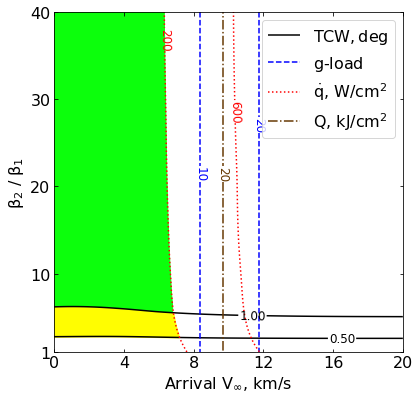

In [5]:
x = np.loadtxt('../data/jsr-paper/mars/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/mars/'+runID+'betaRatio_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
s1 = interpolate.interp2d(x, y, np.transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   20,  110)
y_new =  np.linspace( 0.0,   41 ,110)

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([0.5,1.0])

Glevels = np.array([10, 20])
Qlevels = np.array([200.0, 600.0])
Hlevels = np.array([20])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([6.25,6.25])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

plt.xlim([0.0,20.0])
plt.ylim([1.0,41.0])


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=12, colors='black',fmt='%.2f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

Glabels=plt.clabel(GCS1, inline=1, fontsize=12, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[0].set_linewidths(1.5)

GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=12, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot')

Hlabels=plt.clabel(HCS1, inline=1, fontsize=12, colors='xkcd:brown',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.5)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')


#GCS1.collections[0].set_label(r'$Peak$'+r' '+r'$g-load$')
plt.ylim(1,40)
#plt.grid(True,linestyle='dotted', linewidth=0.3)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel(r'$\beta_2$'+' / '+r'$ \beta_1 $' ,fontsize=16)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=16)
plt.xticks(np.array([ 0, 4, 8, 12, 16, 20]), fontsize=16)
plt.yticks(np.array([ 1, 10, 20, 30, 40,]),fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=16)

for l in Hlabels:
    l.set_rotation(-90)
for l in Glabels:
    l.set_rotation(-90)

dat0 = ZCS1.allsegs[1][0]

x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)


dat2 = QCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)

dat0a = ZCS1.allsegs[0][0]
x1a,y1a=dat0a[:,0],dat0a[:,1]
F1a = interpolate.interp1d(x1a, y1a, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,20,301)
y4 = F1(x4)
y4a =F1a(x4)


y6 = F3(x4)

y7 = y6
y8 = np.minimum(y4,y6)



plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')

plt.fill_between(x4, y4a, y8, where=y4a<=y8,color='xkcd:bright yellow')







plt.savefig('../data/jsr-paper/mars/mars-drag-small.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/mars/mars-drag-small.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/mars/mars-drag-small.eps', dpi=300,bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


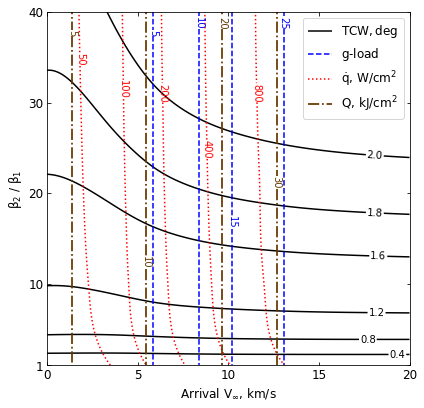

In [12]:
x = np.loadtxt('../data/jsr-paper/mars/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/mars/'+runID+'betaRatio_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'stag_pres_atm_max_array.txt')

f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')

x_new =  np.linspace( 0.0,   20,  210)
y_new =  np.linspace( 1.0,   41 , 110)

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])

Z1 = z1_new
G1 = g1_new
Q1 = q1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([0.4, 0.8, 1.2, 1.6, 1.8, 2.0])

Glevels = np.array([5.0, 10.0, 15.0, 25.0])
Qlevels = np.array([50.0, 100.0, 200.0,  400.0, 800.0 ])
Hlevels = np.array([5.0, 10.0, 20.0, 30.0])
#Slevels = np.array([0.8])

fig = plt.figure()
fig.set_size_inches([6.5,6.5])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.1f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[3].set_linewidths(1.5)
ZCS1.collections[4].set_linewidths(1.5)
ZCS1.collections[5].set_linewidths(1.5)

ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

Glabels=plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[2].set_linewidths(1.5)
GCS1.collections[3].set_linewidths(1.5)
GCS1.collections[0].set_label(r'$g$'+r'-load')


for l in Glabels:
    l.set_rotation(-90)



QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)
QCS1.collections[4].set_linewidths(1.5)

QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot')

Hlabels=plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[2].set_linewidths(1.75)
HCS1.collections[3].set_linewidths(1.75)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

for l in Hlabels:
    l.set_rotation(-90)
    
#GCS1.collections[0].set_label(r'$Peak$'+r' '+r'$g-load$')
plt.ylim(1,40)
#plt.grid(True,linestyle='dotted', linewidth=0.3)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel(r'$\beta_2$'+' / '+r'$ \beta_1 $' ,fontsize=12)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=12)
plt.xticks(np.array([ 0.0, 5, 10, 15, 20]),fontsize=12)
plt.yticks(np.array([ 1, 10, 20, 30, 40]),fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=12)


plt.savefig('../data/jsr-paper/mars/mars-drag-large.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/mars/mars-drag-large.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/mars/mars-drag-large.eps', dpi=300,bbox_inches='tight')

plt.show()